In [26]:
#Here we will make a predictive system on loan data . 
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import seaborn as sns

In [27]:
loan = pd.read_csv(r'C:\Users\hp\OneDrive\Desktop\ML project\Project_4\loan_data.csv')

In [28]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [29]:
loan.shape

(614, 13)

In [30]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [31]:
loan = loan.dropna()

<Axes: xlabel='Married', ylabel='count'>

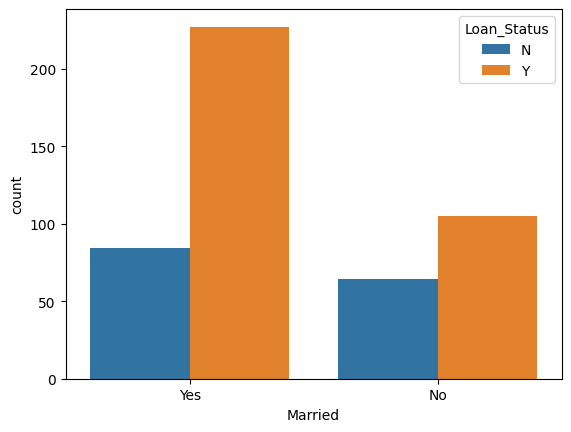

In [32]:
sns.countplot(x='Married',hue='Loan_Status',data=loan)

<Axes: xlabel='Education', ylabel='count'>

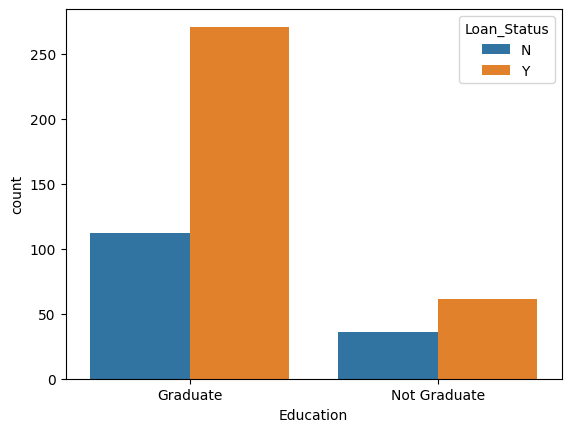

In [33]:
sns.countplot(x='Education',hue='Loan_Status',data=loan)

<Axes: xlabel='Property_Area', ylabel='count'>

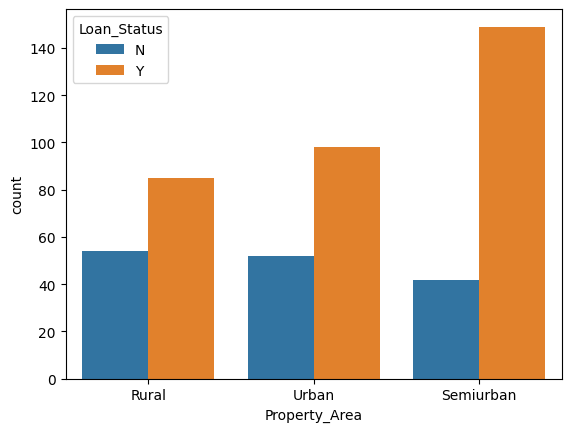

In [34]:
sns.countplot(x='Property_Area',hue='Loan_Status',data=loan)

In [35]:
loan['Dependents'].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [36]:
loan = loan.replace(to_replace='3+',value=4)

In [37]:
loan['Dependents'].value_counts()

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

In [38]:
#Assigning numerical values to the data.
loan.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':0,'Female':1},'Education':{'Graduate':1,'Not Graduate':0},
             'Self_Employed':{'No':0,'Yes':1},'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Loan_Status':{'Y':1,'N':0}},inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_4260\3147390395.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':0,'Female':1},'Education':{'Graduate':1,'Not Graduate':0},


In [39]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [40]:
#Splitting features and the target
X = loan.drop(columns=['Loan_Status','Loan_ID'],axis=1)
Y = loan['Loan_Status']

In [41]:
print(X)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         0        1          1          1              0             4583   
2         0        1          0          1              1             3000   
3         0        1          0          0              0             2583   
4         0        0          0          1              0             6000   
5         0        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       1        0          0          1              0             2900   
610       0        1          4          1              0             4106   
611       0        1          1          1              0             8072   
612       0        1          2          1              0             7583   
613       1        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [42]:
print(Y)

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64


In [48]:
#Splitting data into training and testing 
X_train,X_test, Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [49]:
#fitting into the model
model = SVC(kernel='linear')

In [50]:
model.fit(X_train,Y_train)

SVC(kernel='linear')

In [51]:
#evaluation on training data
train_pred = model.predict(X_train)
Acc = accuracy_score(train_pred,Y_train)
print("Train prediction acc :"+ str(Acc))

Train prediction acc :0.7476851851851852


In [52]:
#evaluation of testing
test_pred = model.predict(X_test)
Acc2 = accuracy_score(test_pred,Y_test)
print("Train prediction acc :"+ str(Acc))

Train prediction acc :0.7476851851851852
